In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

col_names = list(range(1610))
other_names = ['stop', 'north', 'east', 'south', 'west']
col_names.extend(other_names)

# read the data

In [3]:
df_North = pd.read_csv('my_data_North.csv')
df_South = pd.read_csv('my_data_South.csv')

In [4]:
df_North.shape

(5151, 1615)

In [5]:
df_South.shape

(5159, 1615)

In [6]:
#df_North = pd.read_csv('my_data_North.csv', names = col_names, header = None)
#df_South = pd.read_csv('my_data_South.csv', names = col_names, header = None)
#df_data = df_data[0:0],
#df_North.to_csv('my_data_North.csv', index = False)
#df_South.to_csv('my_data_South.csv', index = False)

In [7]:
df_North.head()

,0,1,2,3,4,5,6,7,8,9,...,1605,1606,1607,1608,1609,stop,north,east,south,west
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [8]:
#df_data.fillna(0, inplace = True)

In [9]:
#df_data.isnull().sum().sum()

In [10]:
#df_data = df_data.astype({'friend_scary':'int32'})

In [11]:
#df_data['friend_scary']

# extract features and labels

In [12]:
features_North = df_North[df_North.columns[:-5]].to_numpy()
features_South = df_South[df_South.columns[:-5]].to_numpy()

In [13]:
labels_North = df_North[df_North.columns[-5:]].to_numpy()
labels_South = df_South[df_South.columns[-5:]].to_numpy()

In [14]:
features_North.shape

(5151, 1610)

In [15]:
labels_North.shape

(5151, 5)

In [16]:
features_South.shape

(5159, 1610)

In [17]:
labels_South.shape

(5159, 5)

In [18]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
import joblib

In [20]:
features = [features_North, features_South]
labels = [labels_North, labels_South]
file_names = ['model_North.sav', 'model_South.sav']

In [22]:
for i in range(2):    
    #scaler = StandardScaler()
    #scaler.fit(features[i])
    #X_train = scaler.transform(features[i])

    mlp = MLPClassifier(hidden_layer_sizes=(1200, 300), activation='tanh', solver='adam',
                        max_iter=500)
    mlp.fit(features[i], labels[i])
    
    joblib.dump(mlp, file_names[i])

# here cross validation can be made

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features[i], labels[i], test_size=0.30, random_state=42)
print(X_train.shape); print(X_test.shape); print(y_train.shape); print(y_test.shape)

scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
mlp = MLPClassifier(hidden_layer_sizes=(1200, 300), activation='tanh', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1200, 300), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [56]:
predict_train = mlp.predict_proba(X_train)
predict_test = mlp.predict_proba(X_test)

In [58]:
#print(confusion_matrix(y_train,predict_train))
#print(classification_report(y_train,predict_train))

In [52]:
#print(confusion_matrix(y_test,predict_test))
#print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.93      0.90      0.92       415
           2       0.92      0.95      0.93       532
           3       0.87      0.89      0.88       319
           4       0.92      0.83      0.88       280

   micro avg       0.91      0.90      0.91      1546
   macro avg       0.73      0.71      0.72      1546
weighted avg       0.91      0.90      0.91      1546
 samples avg       0.90      0.90      0.90      1546



['model_North.sav']

# Practice_ML

# functions

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [12]:
def sigmoid_der(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [13]:
def tang_h(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

In [14]:
def tang_h_der(x):
    return 1 - np.square(tang_h(x))

In [15]:
def softmax(A):
    exp_A = np.exp(A)
    return exp_A / exp_A.sum(axis = 1, keepdims = True)

In [16]:
def normalize(features):
    z_norm = []
    for row in features:
        m = np.mean(row)
        sd = np.sqrt(np.sum((row - m) ** 2) / (features_number - 1))
        z_norm.append((row - m) / sd)
    return np.asarray(z_norm)

In [17]:
act_func = sigmoid
der_func = sigmoid_der

# generate weights

In [17]:
#cases_number = features.shape[0]
features_number = features_North.shape[1]

In [18]:
neurons = 700
outputs = 5

In [ ]:
features_North_norm = normalize(features_North)
features_South_norm = normalize(features_South)

In [28]:
wh = np.random.rand(features_number, neurons) * np.sqrt(2.0 / features_number)
bh = np.random.randn(neurons)

In [29]:
wo = np.random.rand(neurons, outputs) * np.sqrt(2.0 / neurons)
bo = np.random.randn(outputs)

In [30]:
learning_rate = 1e-6

In [18]:
def train_model(features, labels, name):
    error_cost = []
    counter = 0
    for epoch in range(5000):
        # feed forward
        sh = np.dot(features, wh) + bh
        ah = act_func(sh)
        so = np.dot(ah, wo) + bo
        ao = softmax(so)

        # back propagation
        der_cost_so = ao - labels
        der_cost_bo = der_cost_so
        der_so_wo = ah
        der_cost_wo = np.dot(der_so_wo.T, der_cost_so)

        der_so_ah = wo
        der_cost_ah = np.dot(der_cost_so, der_so_ah.T)
        der_ah_sh = der_func(sh)
        der_sh_wh = features
        der_cost_wh = np.dot(der_sh_wh.T, der_ah_sh * der_cost_ah)
        der_cost_bh = der_cost_ah * der_ah_sh

        # update weights
        wh -= learning_rate * der_cost_wh
        bh -= learning_rate * der_cost_bh.sum(axis = 0)
        wo -= learning_rate * der_cost_wo
        bo -= learning_rate * der_cost_bo.sum(axis = 0)

        if epoch % 200 == 0:
            loss = np.sum(-labels * np.log(ao))
            error_cost.append(loss)
            print(counter)
            counter += 200
    
    file_wh = 'wh_' + name + '.npy'
    file_bh = 'bh_' + name + '.npy'
    file_wo = 'wo_' + name + '.npy'
    file_bo = 'bo_' + name + '.npy'
    np.save(file_wh, wh)
    np.save(file_bh, bh)
    np.save(file_wo, wo)
    np.save(file_bo, bo)
    
    return error_cost

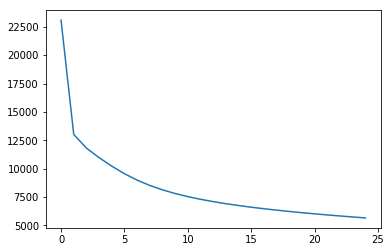

In [32]:
plt.plot(error_cost)
plt.show()

In [33]:
error_cost

[23076.975382688084,
 13016.5656414192,
 11808.398816474059,
 10966.797732593897,
 10216.84663716165,
 9550.333908304756,
 8984.460304617121,
 8515.26077599383,
 8127.363988962858,
 7803.81216796085,
 7530.018527418747,
 7294.662254208968,
 7089.306197754939,
 6907.68201411569,
 6745.067462834295,
 6597.848686690792,
 6463.228405670768,
 6339.024751468348,
 6223.525247749425,
 6115.377916838948,
 6013.509570481139,
 5917.064219416161,
 5825.356066757624,
 5737.832992808633,
 5654.047753608589]

In [34]:
np.save('wh.npy', wh)
np.save('bh.npy', bh)
np.save('wo.npy', wo)
np.save('bo.npy', bo)

# Practice_other

In [59]:
predict_test

array([[9.00029528e-06, 9.99316256e-01, 9.74611261e-04, 8.37011764e-04,
        3.88740601e-04],
       [1.78489133e-05, 1.52379034e-04, 8.50690786e-04, 2.12705447e-03,
        9.98173705e-01],
       [1.22497763e-05, 9.99731346e-01, 5.05311245e-04, 4.24950025e-04,
        3.54249729e-04],
       ...,
       [8.89507452e-07, 7.05185584e-02, 2.78501934e-04, 3.07881372e-01,
        4.58307804e-01],
       [3.44726494e-06, 8.94274119e-04, 7.50313244e-03, 9.93275672e-01,
        1.45630328e-03],
       [3.04041648e-07, 1.46448604e-02, 6.00540819e-03, 2.10629997e-01,
        7.54716423e-01]])

In [65]:
moves = mlp.predict_proba([X_test[0]])[0]

In [66]:
indices = moves.argsort()[::-1]
actions = ['Stop', 'East', 'South']
action_dictionary = {0: 'Stop', 1: 'North', 2: 'East', 3: 'South', 4: 'West'}
for index in indices:
    best_action = action_dictionary[index]
    if best_action in actions:
        print(best_action)

East
South
Stop


In [68]:
moves[0]

9.000295281966452e-06

In [23]:
actions = ['Stop', 'North', 'East', 'South', 'West']
prob = [0.5, 0.1, 0.1, 0.3, 0]

array(['Stop'], dtype='<U5')

In [27]:
np.random.choice(actions, 5, p=prob)

array(['South', 'East', 'Stop', 'South', 'East'], dtype='<U5')